<a href="https://colab.research.google.com/github/hosseinrezaie0/Heart-Failure-Prediction/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss

import warnings as wr
wr.filterwarnings('ignore')

### Preprocess the data

In [131]:
# Download the dataset
# https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


# Load the dataset
df = pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [133]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

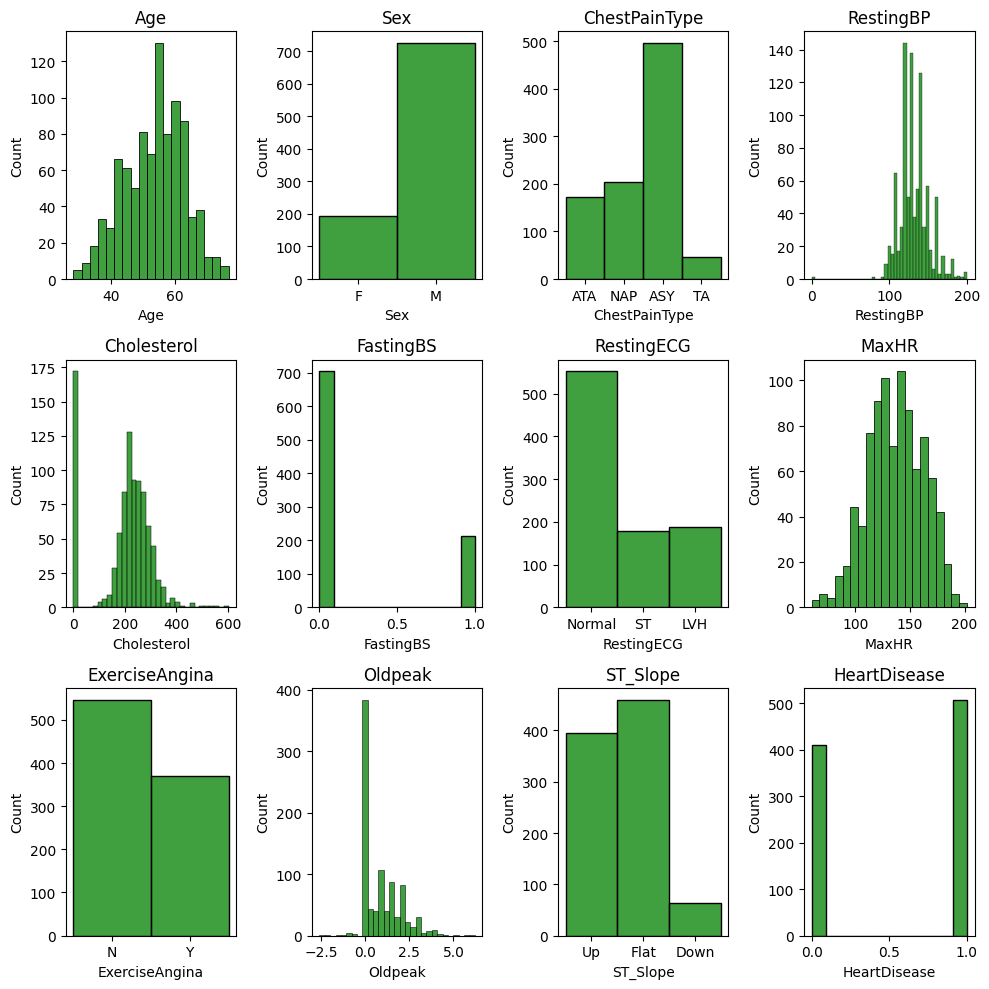

In [134]:
fig, axes = plt.subplots(3,4, figsize=(10,10))
axes = axes.flatten()

for i, col_name in enumerate(df.columns):
  sns.histplot(data=df[col_name], ax= axes[i], color='Green')
  axes[i].set_title(col_name)

plt.tight_layout()
plt.show()

#### Handle Cholesterol = 0

In [135]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
216,9
...,...
157,1
354,1
365,1


In [136]:
df['Cholesterol'].describe().T

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


In [137]:
df[df['Cholesterol'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,172.0,56.238372,8.616327,32.0,51.75,57.50,62.00,74.0
RestingBP,172.0,129.680233,22.971558,0.0,115.00,129.00,140.00,200.0
Cholesterol,172.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.0
FastingBS,172.0,0.517442,0.501155,0.0,0.00,1.00,1.00,1.0
MaxHR,172.0,121.988372,24.166331,60.0,108.00,120.00,138.25,182.0
Oldpeak,172.0,0.825581,1.039645,-2.6,0.00,0.75,1.50,3.7
HeartDisease,172.0,0.883721,0.321495,0.0,1.00,1.00,1.00,1.0


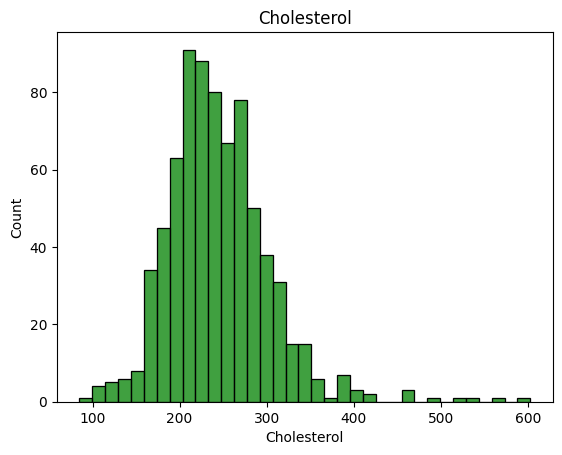

In [138]:
ax = sns.histplot(data=df[df['Cholesterol'] != 0]['Cholesterol'], color='Green')
ax.set_title('Cholesterol')
plt.show()

In [139]:
df[df['Cholesterol'] == 0]['HeartDisease'].value_counts(normalize=True)

,proportion
HeartDisease,
1,0.883721
0,0.116279


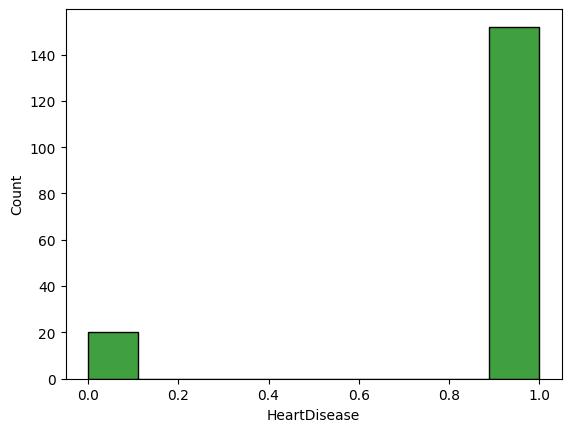

In [140]:
sns.histplot(data=df[df['Cholesterol'] == 0]['HeartDisease'], color='Green')
plt.show()

In [141]:
# Zero Cholesterol is impossible in real world so these data points are probably representing null values.
# since about 20 percent of the data points have a cholesterol of 0, we can't just remove them.
# Instead, we can replace the 0 values with the mean cholesterol value.

df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())

In [142]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
198.799564,172
254.000000,11
220.000000,10
223.000000,10
216.000000,9
...,...
157.000000,1
354.000000,1
365.000000,1


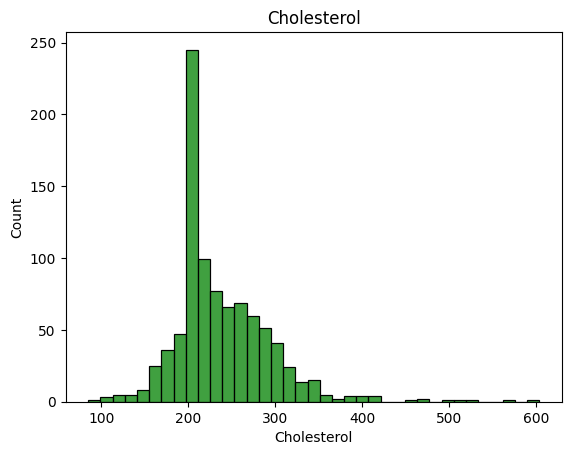

In [143]:
ax = sns.histplot(data=df['Cholesterol'], color='Green')
ax.set_title('Cholesterol')
plt.show()

#### Normalize non categorical columns

In [144]:
scaler = MinMaxScaler()
non_categorical_cols = df.select_dtypes(exclude='object').columns
df[non_categorical_cols] = scaler.fit_transform(df[non_categorical_cols])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.714286,F,ATA,0.700,0.212355,0.0,Normal,0.838028,N,0.295455,Up,0.0
1,0.510204,M,NAP,0.725,0.835907,0.0,Normal,0.492958,N,0.295455,Flat,1.0
2,0.755102,M,ASY,0.800,0.219690,1.0,ST,0.436620,N,0.431818,Flat,1.0
3,0.571429,M,ASY,0.650,0.219690,0.0,LVH,0.436620,Y,0.409091,Flat,1.0
4,0.530612,M,ATA,0.540,0.432432,0.0,Normal,0.676056,N,0.295455,Up,0.0


#### Convert categorical text data to numbers

In [145]:
encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
  df[col] = encoder.fit_transform(df[col])
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,0.714286,0,1,0.700,0.212355,0.0,1,0.838028,0,0.295455,2,0.0
1,0.510204,1,2,0.725,0.835907,0.0,1,0.492958,0,0.295455,1,1.0
2,0.755102,1,0,0.800,0.219690,1.0,2,0.436620,0,0.431818,1,1.0
3,0.571429,1,0,0.650,0.219690,0.0,0,0.436620,1,0.409091,1,1.0
4,0.530612,1,1,0.540,0.432432,0.0,1,0.676056,0,0.295455,2,0.0


#### Plot the correlations

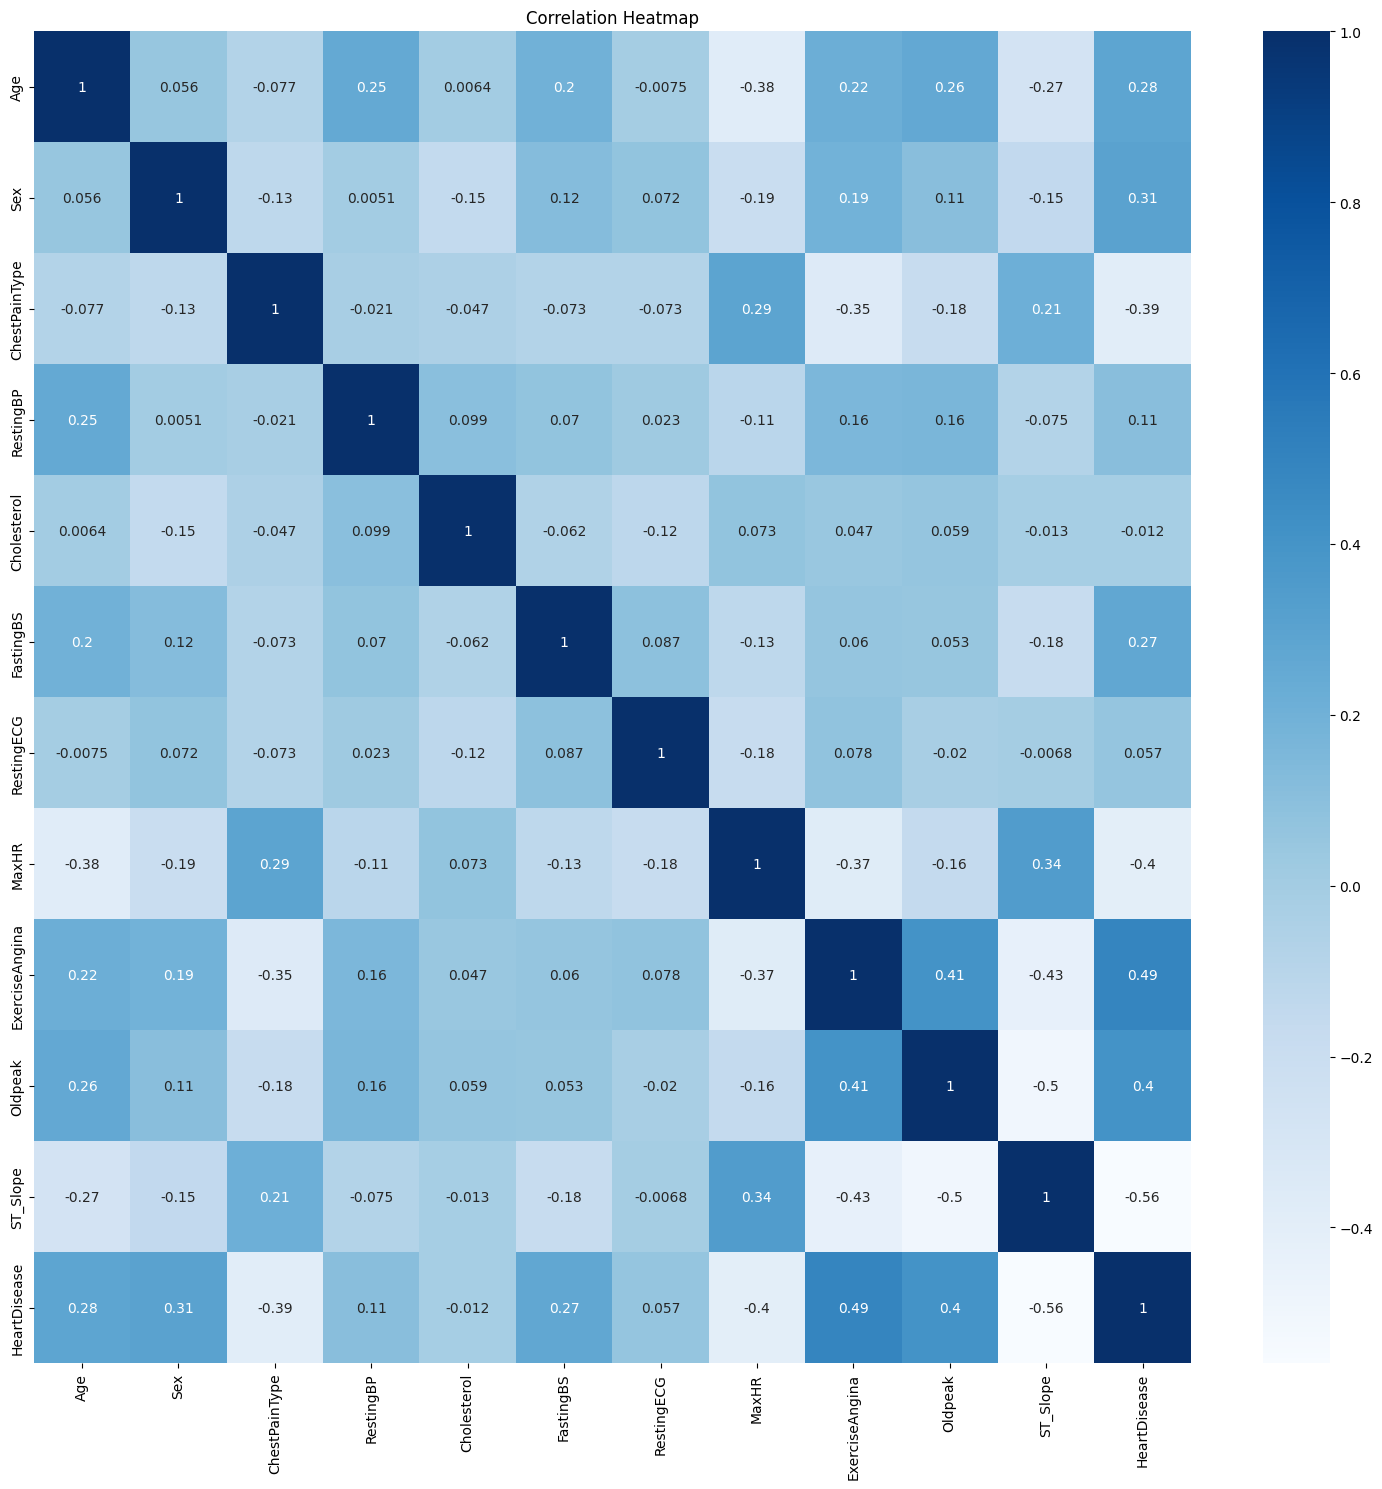

In [146]:
fig, axes = plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='Blues', ax=axes)
axes.set_title('Correlation Heatmap')
plt.tight_layout()
plt.show()

#### Split the data into train and test

In [147]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Get test set
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

### Train the models

In [148]:
def get_preds_probs(model, X, y):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)
  return accuracy_score(y, y_pred), precision_score(y, y_pred), recall_score(y, y_pred), f1_score(y, y_pred), log_loss(y, y_prob)

#### Logistic Regression

In [149]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(lr_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(lr_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(lr_model, X_test, y_test)

lr_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(lr_results.round(4))



          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8399     0.8485  0.8642    0.8563    0.3721
1  Validation    0.8367     0.8452  0.8659    0.8554    0.4116
2        Test    0.8750     0.8835  0.8922    0.8878    0.3474


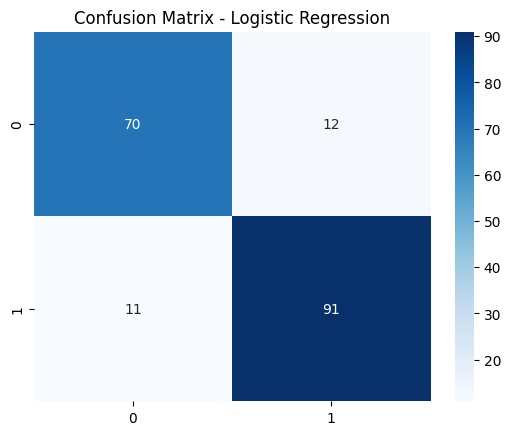

In [150]:
ax = sns.heatmap(confusion_matrix(y_test, lr_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Logistic Regression')
plt.show()

#### K-Nearest Neighbour

In [151]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(knn_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(knn_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(knn_model, X_test, y_test)

knn_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(knn_results.round(4))


          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8876     0.8817  0.9198    0.9003    0.2434
1  Validation    0.8095     0.7935  0.8902    0.8391    2.2140
2        Test    0.8478     0.8700  0.8529    0.8614    1.4197


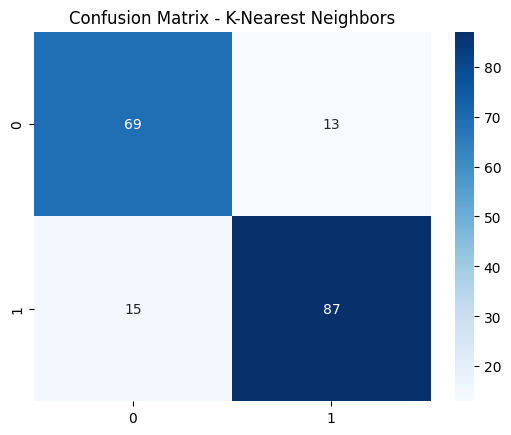

In [152]:
ax = sns.heatmap(confusion_matrix(y_test, knn_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - K-Nearest Neighbors')
plt.show()

#### Decision Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=4, random_state=42)
dt_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(dt_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(dt_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(dt_model, X_test, y_test)

dt_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(dt_results.round(4))

          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.9080     0.9219  0.9105    0.9161    0.2376
1  Validation    0.7619     0.8219  0.7317    0.7742    2.3018
2        Test    0.7989     0.8421  0.7843    0.8122    1.7396


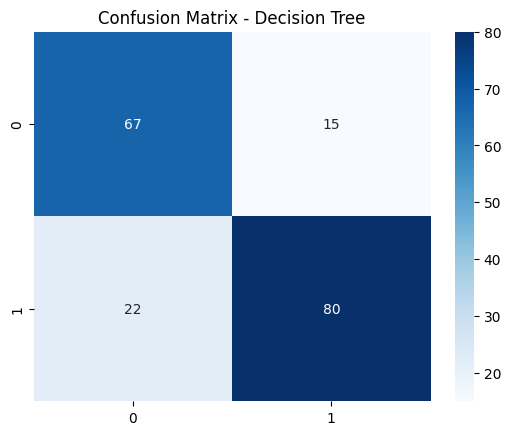

In [154]:
ax = sns.heatmap(confusion_matrix(y_test, dt_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Decision Tree')
plt.show()

#### Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=10, max_depth=5,min_samples_leaf=4, min_samples_split=4, random_state=42)
rf_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(rf_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(rf_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(rf_model, X_test, y_test)

rf_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(rf_results.round(4))

          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8876     0.8886  0.9105    0.8994    0.2991
1  Validation    0.8571     0.8765  0.8659    0.8712    0.3491
2        Test    0.8587     0.8654  0.8824    0.8738    0.3428


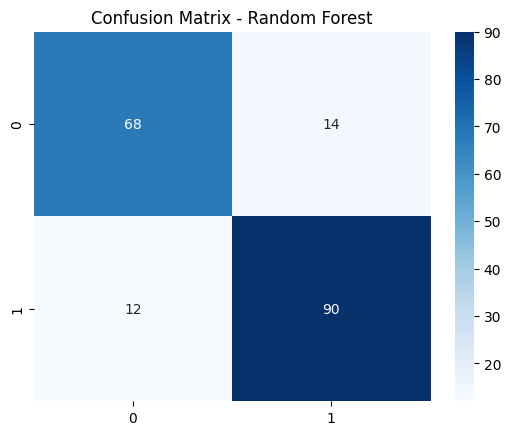

In [156]:
ax = sns.heatmap(confusion_matrix(y_test, rf_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Random Forest')
plt.show()

#### Gradient Boosting

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=10, max_depth=3, min_samples_leaf=2, min_samples_split=10, random_state=42)
gb_model.fit(X_train, y_train)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(gb_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(gb_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(gb_model, X_test, y_test)

gb_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(gb_results.round(4))

          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.8688     0.8643  0.9043    0.8839    0.4146
1  Validation    0.8639     0.8690  0.8902    0.8795    0.4428
2        Test    0.8696     0.8679  0.9020    0.8846    0.4174


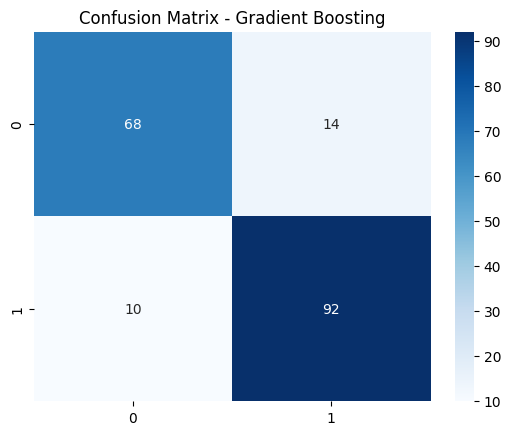

In [158]:
ax = sns.heatmap(confusion_matrix(y_test, gb_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - Gradient Boosting')
plt.show()

#### XGBoost


In [159]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=10, max_depth=3, min_samples_leaf=2, min_samples_split=5, random_state=4)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

acc_train, precision_train, recall_train, f1_train, log_loss_train = get_preds_probs(xgb_model, X_train, y_train)
acc_val, precision_val, recall_val, f1_val, log_loss_val = get_preds_probs(xgb_model, X_val, y_val)
acc_test, precision_test, recall_test, f1_test, log_loss_test = get_preds_probs(xgb_model, X_test, y_test)

xgb_results = pd.DataFrame({
    "Set": ["Train", "Validation", "Test"],
    "Accuracy": [acc_train, acc_val, acc_test],
    "Precision": [precision_train, precision_val, precision_test],
    "Recall": [recall_train, recall_val, recall_test],
    "F1 Score": [f1_train, f1_val, f1_test],
    "Log Loss": [log_loss_train, log_loss_val, log_loss_test]
})

print(xgb_results.round(4))

          Set  Accuracy  Precision  Recall  F1 Score  Log Loss
0       Train    0.9063     0.9138  0.9167    0.9153    0.2876
1  Validation    0.8435     0.8734  0.8415    0.8571    0.3592
2        Test    0.8750     0.8911  0.8824    0.8867    0.3331


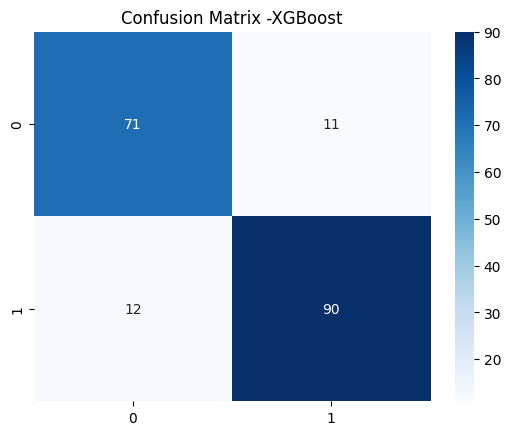

In [160]:
ax = sns.heatmap(confusion_matrix(y_test, xgb_model.predict(X_test)), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix -XGBoost')
plt.show()

#### ANN

In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense

ann_model = Sequential(
    [
        Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
    ]
)

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

Epoch 1/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4212 - loss: 0.7360 - val_accuracy: 0.4898 - val_loss: 0.6849
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5845 - loss: 0.6686 - val_accuracy: 0.7211 - val_loss: 0.6497
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7686 - loss: 0.6292 - val_accuracy: 0.7687 - val_loss: 0.6116
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7934 - loss: 0.5891 - val_accuracy: 0.8095 - val_loss: 0.5516
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7657 - loss: 0.5496 - val_accuracy: 0.8435 - val_loss: 0.4946
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8213 - loss: 0.4635 - val_accuracy: 0.8095 - val_loss: 0.4532
Epoch 7/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8158 - loss: 0.4463 - val_accuracy: 0.8299 - val_loss: 0.4288
Epoch 8/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8118 - loss: 0.4250 - val_accuracy: 0.8299 - val_loss

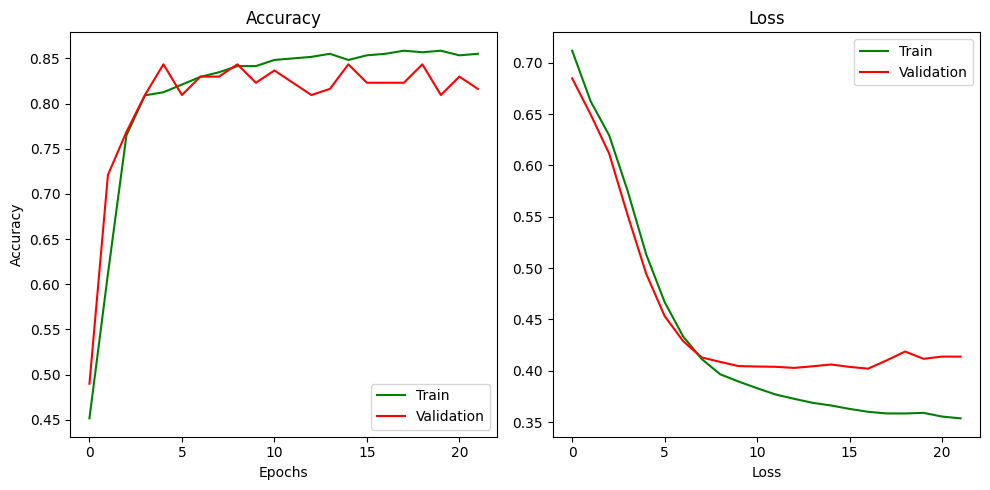

In [194]:
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
loss_train = history.history['loss']
loss_val = history.history['val_loss']

fig, axes = plt.subplots(1,2, figsize=(10,5))
axes[0].plot(acc_train, label='Train', color='green')
axes[0].plot(acc_val, label='Validation', color='red')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()


axes[1].plot(loss_train, label='Train', color='green')
axes[1].plot(loss_val, label='Validation', color='red')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_xlabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

In [201]:
print(f"Number of epochs: {len(history.history['loss'])}")

Number of epochs: 22


In [195]:
loss, acc = ann_model.evaluate(X_test, y_test, verbose=False)
print(f'Accuracy: {acc}')
print(f'Loss: {loss}')

Accuracy: 0.885869562625885
Loss: 0.3177698254585266


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


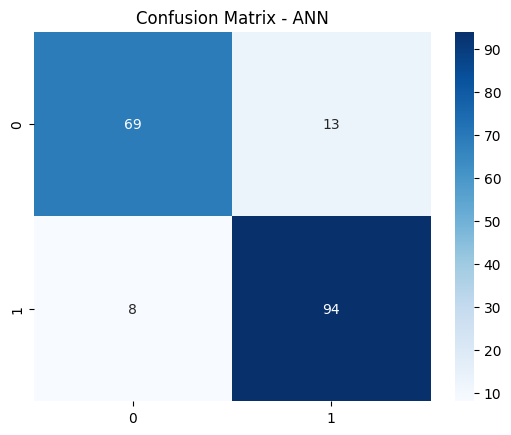

In [196]:
ax = sns.heatmap(confusion_matrix(y_test, ann_model.predict(X_test) > 0.5), annot=True, cmap='Blues')
ax.set_title('Confusion Matrix - ANN')
plt.show()